<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
<ul class="toc-item">
<li>
<span>
<a href="#Executive_Summary" data-toc-modified-id="Executive_Summary">
<span class="toc-item-num">1.&nbsp;&nbsp;</span>Executive Summary</a>
</span>
</li>
<span>
<a href="#Appendix" data-toc-modified-id="Appendix">
<span class="toc-item-num">2.&nbsp;&nbsp;</span>Appendix</a>
</span>
<ul class="toc-item">
<li>
<span>
<a href="#Model_Comparison" data-toc-modified-id="Model_Comparison">
<span class="toc-item-num">2.1&nbsp;&nbsp;</span>Classification Model Comparison</a>
</span>
<ul class="toc-item">
</ul>
</li>
</ul>    
</ul> 
</div>

# Executive Summary

<a id='Executive_Summary'></a>

Iris Setosa appears to have the smallest petal width, followed by Iris Veriscolour, and then Iris Virginica. There appears to be overlap in values between Iris Versicolour and Iris Virginica, but not Iris Setosa. Petal width would therefore be a useful feature in classifying Iris Setosa. 

Iris Setosa appears to have the smallest petal length, followed by Iris Veriscolour, and then Iris Virginica. There appears to be overlap in values between Iris Versicolour and Iris Virginica, but not Iris Setosa. Petal length would therefore be a useful feature in classifying Iris Setosa. 

Iris Versicolour appears to have the smallest sepal width, followed by Iris Virginica, and then Iris Setosa. Sepal length appears to increase between plant classes, ranging from; Iris Setosa at the shortest, to Iris Versicolour, and Iris Virginica at the longest.

Changing the number of neighbors appears to have little impact on the accuracy of the prediction. Although, the highest accuracies were acheived with ten neighbors.

Additional classification algorithms were evaluated. All algorithms yielded comparable results. [Classification Model Comparison](#Model_Comparison)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

warnings.filterwarnings('ignore')
sns.set()

class Iris:
    
    data = np.array([])
    data_train = np.array([])
    data_train_scaled = np.array([])
    data_test = np.array([])    
    data_test_scaled = np.array([])
    
    prediction = np.array([])
    
    target_test = np.array([])    
    target_train = np.array([])    
    target = np.array([])
    
    data_df = pd.DataFrame()
    iris_df = pd.DataFrame()
    target_df = pd.DataFrame()
    
    plant_class = {0: 'Iris Setosa', 1: 'Iris Versicolour', 2: 'Iris Virginica'}
    
    prediction_score = 0
    
    def download_data(self):

        self.data = load_iris().data
        self.target = load_iris().target
        
        self.data_df = pd.DataFrame(self.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
        self.target_df = pd.DataFrame(self.target, columns=['target'])
        self.iris_df = self.data_df.merge(self.target_df, left_index = True, right_index = True)
        self.iris_df['plant_class'] = self.iris_df['target'].map(self.plant_class)
    
    def split_data(self):

        self.data_train, \
        self.data_test, \
        self.target_train, \
        self.target_test = train_test_split(self.data, \
                                            self.target, \
                                            test_size = 0.2)

        scaler = StandardScaler()
        scaler.fit(self.data_train)
        self.data_test_scaled = scaler.transform(self.data_test)
        self.data_train_scaled = scaler.transform(self.data_train)
    
    def run_algorithm(self, algorithm):

        classifier = algorithm
        classifier.fit(self.data_train_scaled, self.target_train)
        self.prediction = classifier.predict(self.data_test_scaled)
        self.prediction_score = classifier.score(self.data_test_scaled, self.target_test)
    
    def __init__(self):        
        
        self.download_data()
        
_iris = Iris()

_iris.data_df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
_iris.data_df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [3]:
_iris.target_df

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [4]:
_iris.target_df.isna().sum()

target    0
dtype: int64

In [5]:
_iris.iris_df

,sepal_length,sepal_width,petal_length,petal_width,target,plant_class
0,5.1,3.5,1.4,0.2,0,Iris Setosa
1,4.9,3.0,1.4,0.2,0,Iris Setosa
2,4.7,3.2,1.3,0.2,0,Iris Setosa
3,4.6,3.1,1.5,0.2,0,Iris Setosa
4,5.0,3.6,1.4,0.2,0,Iris Setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,Iris Virginica
146,6.3,2.5,5.0,1.9,2,Iris Virginica
147,6.5,3.0,5.2,2.0,2,Iris Virginica
148,6.2,3.4,5.4,2.3,2,Iris Virginica


In [6]:
_iris.iris_df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
plant_class     0
dtype: int64

In [7]:
_iris.iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,plant_class
0,5.1,3.5,1.4,0.2,0,Iris Setosa
1,4.9,3.0,1.4,0.2,0,Iris Setosa
2,4.7,3.2,1.3,0.2,0,Iris Setosa
3,4.6,3.1,1.5,0.2,0,Iris Setosa
4,5.0,3.6,1.4,0.2,0,Iris Setosa


In [8]:
iris_grouped = _iris.iris_df.groupby('plant_class')
iris_grouped.mean()

,sepal_length,sepal_width,petal_length,petal_width,target
plant_class,,,,,
Iris Setosa,5.006,3.428,1.462,0.246,0
Iris Versicolour,5.936,2.770,4.260,1.326,1
Iris Virginica,6.588,2.974,5.552,2.026,2


In [9]:
iris_grouped.median()

,sepal_length,sepal_width,petal_length,petal_width,target
plant_class,,,,,
Iris Setosa,5.0,3.4,1.50,0.2,0
Iris Versicolour,5.9,2.8,4.35,1.3,1
Iris Virginica,6.5,3.0,5.55,2.0,2


In [10]:
iris_grouped.var()

,sepal_length,sepal_width,petal_length,petal_width,target
plant_class,,,,,
Iris Setosa,0.124249,0.143690,0.030159,0.011106,0
Iris Versicolour,0.266433,0.098469,0.220816,0.039106,0
Iris Virginica,0.404343,0.104004,0.304588,0.075433,0


In [11]:
iris_grouped.std()

,sepal_length,sepal_width,petal_length,petal_width,target
plant_class,,,,,
Iris Setosa,0.352490,0.379064,0.173664,0.105386,0.0
Iris Versicolour,0.516171,0.313798,0.469911,0.197753,0.0
Iris Virginica,0.635880,0.322497,0.551895,0.274650,0.0


In [12]:
iris_grouped.skew()

,sepal_length,sepal_width,petal_length,petal_width,target
plant_class,,,,,
Iris Setosa,0.120087,0.041167,0.106394,1.253861,0.0
Iris Versicolour,0.105378,-0.362845,-0.606508,-0.031180,0.0
Iris Virginica,0.118015,0.365949,0.549445,-0.129477,0.0


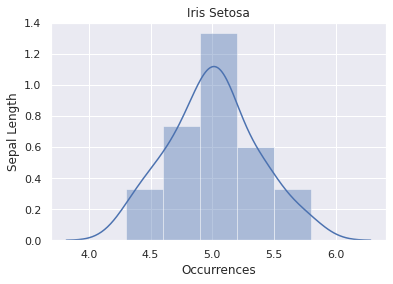

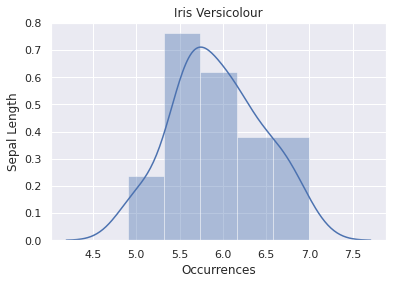

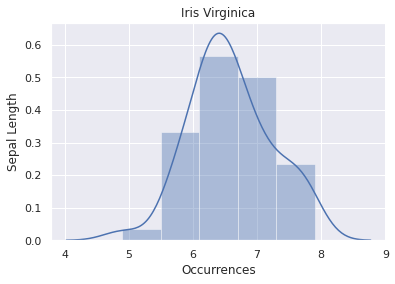

In [13]:
sns.distplot(_iris.iris_df[_iris.iris_df.plant_class == 'Iris Setosa'].sepal_length, bins = 5)
plt.xlabel('Occurrences')
plt.ylabel('Sepal Length')
plt.title('Iris Setosa')
plt.show()

sns.distplot(_iris.iris_df[_iris.iris_df.plant_class == 'Iris Versicolour'].sepal_length, bins = 5)
plt.xlabel('Occurrences')
plt.ylabel('Sepal Length')
plt.title('Iris Versicolour')
plt.show()

sns.distplot(_iris.iris_df[_iris.iris_df.plant_class == 'Iris Virginica'].sepal_length, bins = 5)
plt.xlabel('Occurrences')
plt.ylabel('Sepal Length')
plt.title('Iris Virginica')
plt.show()

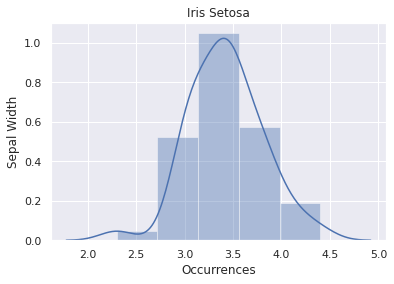

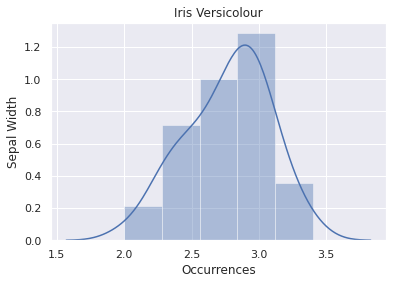

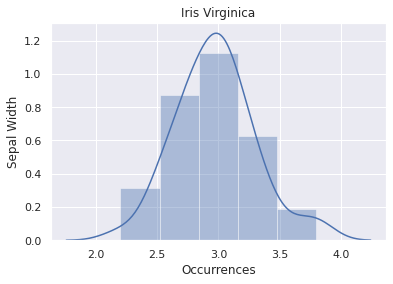

In [14]:
sns.distplot(_iris.iris_df[_iris.iris_df.plant_class == 'Iris Setosa'].sepal_width, bins = 5)
plt.xlabel('Occurrences')
plt.ylabel('Sepal Width')
plt.title('Iris Setosa')
plt.show()

sns.distplot(_iris.iris_df[_iris.iris_df.plant_class == 'Iris Versicolour'].sepal_width, bins = 5)
plt.xlabel('Occurrences')
plt.ylabel('Sepal Width')
plt.title('Iris Versicolour')
plt.show()

sns.distplot(_iris.iris_df[_iris.iris_df.plant_class == 'Iris Virginica'].sepal_width, bins = 5)
plt.xlabel('Occurrences')
plt.ylabel('Sepal Width')
plt.title('Iris Virginica')
plt.show()

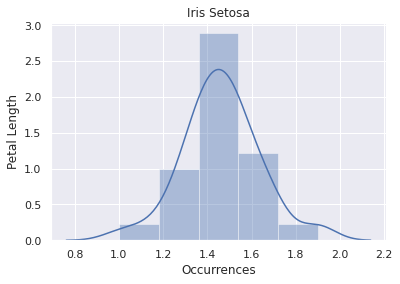

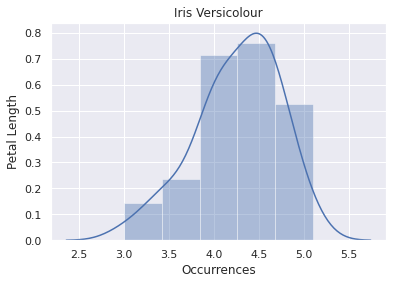

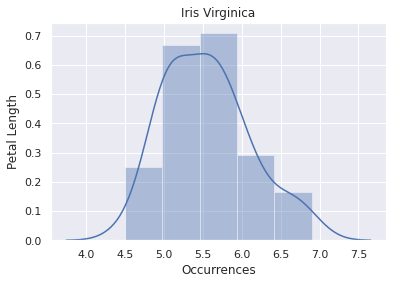

In [15]:
sns.distplot(_iris.iris_df[_iris.iris_df.plant_class == 'Iris Setosa'].petal_length, bins = 5)
plt.xlabel('Occurrences')
plt.ylabel('Petal Length')
plt.title('Iris Setosa')
plt.show()

sns.distplot(_iris.iris_df[_iris.iris_df.plant_class == 'Iris Versicolour'].petal_length, bins = 5)
plt.xlabel('Occurrences')
plt.ylabel('Petal Length')
plt.title('Iris Versicolour')
plt.show()

sns.distplot(_iris.iris_df[_iris.iris_df.plant_class == 'Iris Virginica'].petal_length, bins = 5)
plt.xlabel('Occurrences')
plt.ylabel('Petal Length')
plt.title('Iris Virginica')
plt.show()

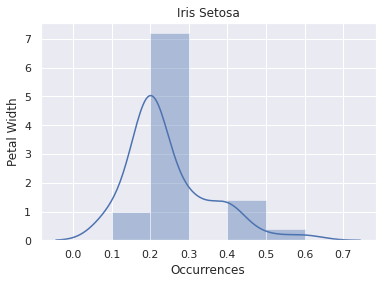

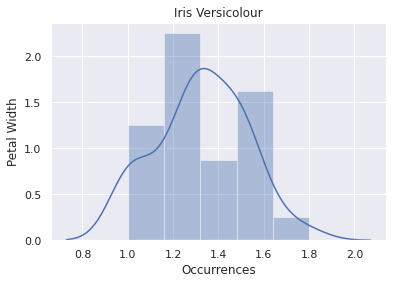

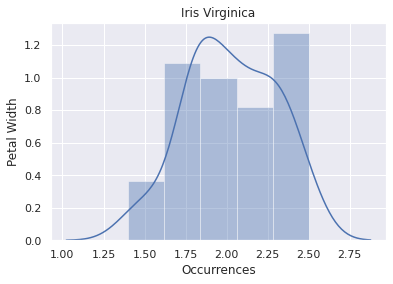

In [16]:
sns.distplot(_iris.iris_df[_iris.iris_df.plant_class == 'Iris Setosa'].petal_width, bins = 5)
plt.xlabel('Occurrences')
plt.ylabel('Petal Width')
plt.title('Iris Setosa')
plt.show()

sns.distplot(_iris.iris_df[_iris.iris_df.plant_class == 'Iris Versicolour'].petal_width, bins = 5)
plt.xlabel('Occurrences')
plt.ylabel('Petal Width')
plt.title('Iris Versicolour')
plt.show()

sns.distplot(_iris.iris_df[_iris.iris_df.plant_class == 'Iris Virginica'].petal_width, bins = 5)
plt.xlabel('Occurrences')
plt.ylabel('Petal Width')
plt.title('Iris Virginica')
plt.show()

In [17]:
print('Iris Setosa:', _iris.iris_df[_iris.iris_df.plant_class == 'Iris Setosa'] \
      .sepal_width.corr(_iris.iris_df[_iris.iris_df.plant_class == 'Iris Setosa'].sepal_length))
print('Iris Versicolour:', _iris.iris_df[_iris.iris_df.plant_class == 'Iris Versicolour'] \
      .sepal_width.corr(_iris.iris_df[_iris.iris_df.plant_class == 'Iris Versicolour'].sepal_length))
print('Iris Virginica:', _iris.iris_df[_iris.iris_df.plant_class == 'Iris Virginica'] \
      .sepal_width.corr(_iris.iris_df[_iris.iris_df.plant_class == 'Iris Virginica'].sepal_length))

Iris Setosa: 0.7425466856651598
Iris Versicolour: 0.5259107172828243
Iris Virginica: 0.457227816394113


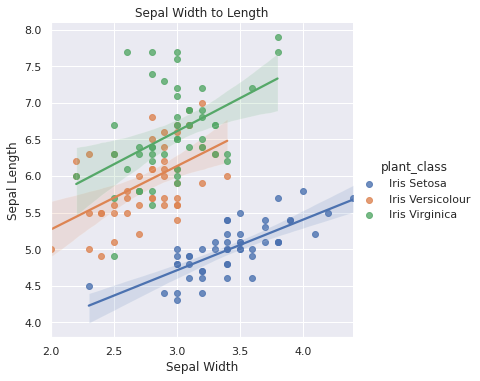

In [18]:
sns.lmplot(x = "sepal_width", y = "sepal_length", data = _iris.iris_df, hue = 'plant_class')
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.title('Sepal Width to Length')
plt.show()

In [19]:
print('Iris Setosa:', _iris.iris_df[_iris.iris_df.plant_class == 'Iris Setosa'] \
      .petal_width.corr(_iris.iris_df[_iris.iris_df.plant_class == 'Iris Setosa'].petal_length))
print('Iris Versicolour:', _iris.iris_df[_iris.iris_df.plant_class == 'Iris Versicolour'] \
      .petal_width.corr(_iris.iris_df[_iris.iris_df.plant_class == 'Iris Versicolour'].petal_length))
print('Iris Virginica:', _iris.iris_df[_iris.iris_df.plant_class == 'Iris Virginica'] \
      .petal_width.corr(_iris.iris_df[_iris.iris_df.plant_class == 'Iris Virginica'].petal_length))

Iris Setosa: 0.33163004080411856
Iris Versicolour: 0.7866680885228169
Iris Virginica: 0.3221082159003183


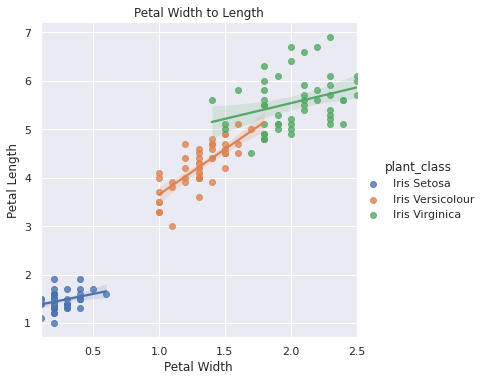

In [20]:
sns.lmplot(x = "petal_width", y = "petal_length", data = _iris.iris_df, hue = 'plant_class')
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Petal Width to Length')
plt.show()

In [21]:
print('Iris Setosa:', _iris.iris_df[_iris.iris_df.plant_class == 'Iris Setosa'] \
      .petal_width.corr(_iris.iris_df[_iris.iris_df.plant_class == 'Iris Setosa'].sepal_width))
print('Iris Versicolour:', _iris.iris_df[_iris.iris_df.plant_class == 'Iris Versicolour'] \
      .petal_width.corr(_iris.iris_df[_iris.iris_df.plant_class == 'Iris Versicolour'].sepal_width))
print('Iris Virginica:', _iris.iris_df[_iris.iris_df.plant_class == 'Iris Virginica'] \
      .petal_width.corr(_iris.iris_df[_iris.iris_df.plant_class == 'Iris Virginica'].sepal_width))

Iris Setosa: 0.2327520113628792
Iris Versicolour: 0.6639987200241115
Iris Virginica: 0.5377280262661887


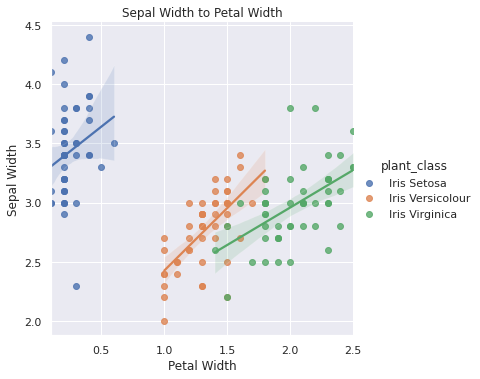

In [22]:
sns.lmplot(x = "petal_width", y = "sepal_width", data = _iris.iris_df, hue = 'plant_class')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.title('Sepal Width to Petal Width')
plt.show()

In [23]:
print('Iris Setosa:', _iris.iris_df[_iris.iris_df.plant_class == 'Iris Setosa'] \
      .petal_length.corr(_iris.iris_df[_iris.iris_df.plant_class == 'Iris Setosa'].sepal_length))
print('Iris Versicolour:', _iris.iris_df[_iris.iris_df.plant_class == 'Iris Versicolour'] \
      .petal_length.corr(_iris.iris_df[_iris.iris_df.plant_class == 'Iris Versicolour'].sepal_length))
print('Iris Virginica:', _iris.iris_df[_iris.iris_df.plant_class == 'Iris Virginica'] \
      .petal_length.corr(_iris.iris_df[_iris.iris_df.plant_class == 'Iris Virginica'].sepal_length))

Iris Setosa: 0.2671757588687571
Iris Versicolour: 0.7540489585920161
Iris Virginica: 0.8642247329355761


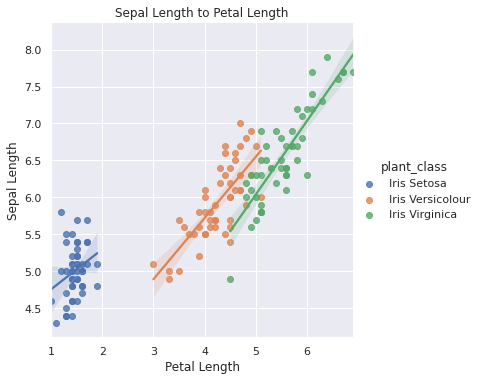

In [24]:
sns.lmplot(x = "petal_length", y = "sepal_length", data = _iris.iris_df, hue = 'plant_class')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.title('Sepal Length to Petal Length')
plt.show()

Iris Setosa appears to have the smallest petal width, followed by Iris Veriscolour, and then Iris Virginica. There appears to be overlap in values between Iris Versicolour and Iris Virginica, but not Iris Setosa. Petal width would therefore be a useful feature in classifying Iris Setosa.

In [25]:
_iris.plant_class

{0: 'Iris Setosa', 1: 'Iris Versicolour', 2: 'Iris Virginica'}

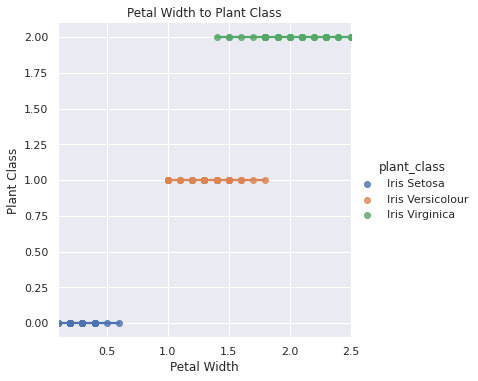

In [26]:
sns.lmplot(x = "petal_width", y = "target", data = _iris.iris_df, hue = 'plant_class')
plt.xlabel('Petal Width')
plt.ylabel('Plant Class')
plt.title('Petal Width to Plant Class')
plt.show()

Iris Setosa appears to have the smallest petal length, followed by Iris Veriscolour, and then Iris Virginica. There appears to be overlap in values between Iris Versicolour and Iris Virginica, but not Iris Setosa. Petal length would therefore be a useful feature in classifying Iris Setosa.

In [27]:
_iris.plant_class

{0: 'Iris Setosa', 1: 'Iris Versicolour', 2: 'Iris Virginica'}

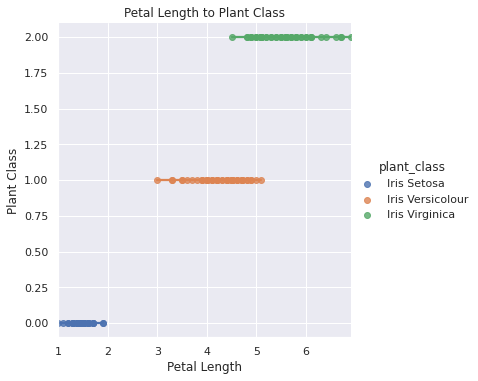

In [28]:
sns.lmplot(x = "petal_length", y = "target", data = _iris.iris_df, hue = 'plant_class')
plt.xlabel('Petal Length')
plt.ylabel('Plant Class')
plt.title('Petal Length to Plant Class')
plt.show()

Iris Versicolour appears to have the smallest sepal width, followed by Iris Virginica, and then Iris Setosa.

In [29]:
_iris.plant_class

{0: 'Iris Setosa', 1: 'Iris Versicolour', 2: 'Iris Virginica'}

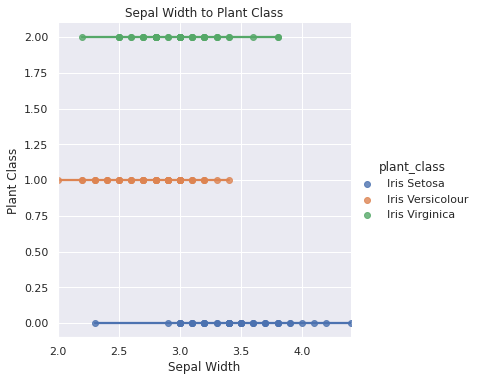

In [30]:
sns.lmplot(x = "sepal_width", y = "target", data = _iris.iris_df, hue = 'plant_class')
plt.xlabel('Sepal Width')
plt.ylabel('Plant Class')
plt.title('Sepal Width to Plant Class')
plt.show()

Sepal length appears to increase between plant classes, ranging from; Iris Setosa at the shortest, to Iris Versicolour, and Iris Virginica at the longest.

In [31]:
_iris.plant_class

{0: 'Iris Setosa', 1: 'Iris Versicolour', 2: 'Iris Virginica'}

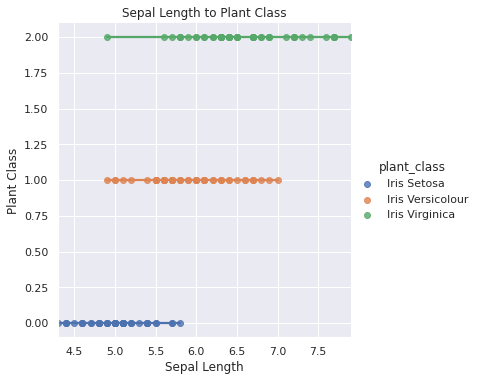

In [32]:
sns.lmplot(x = "sepal_length", y = "target", data = _iris.iris_df, hue = 'plant_class')
plt.xlabel('Sepal Length')
plt.ylabel('Plant Class')
plt.title('Sepal Length to Plant Class')
plt.show()

In [33]:
_iris.split_data()

print(_iris.data_test_scaled)
print(_iris.data_train_scaled)
print(_iris.target_test)
print(_iris.target_train)

[[ 2.30041489 -0.57903823  1.72008046  1.13487898]
 [ 0.58200804  0.52040145  1.32324784  1.8057434 ]
 [-0.15445204 -0.57903823  0.24613071  0.19566879]
 [ 0.213778   -0.13926236  0.64296334  0.86653321]
 [ 1.31846811  0.08062558  0.98310559  1.26905186]
 [-0.15445204 -0.35915029  0.30282109  0.19566879]
 [-1.01365547  1.18006525 -1.28450941 -1.28023294]
 [ 0.70475138 -0.35915029  0.35951146  0.19566879]
 [-0.0317087  -1.0188141   0.18944034  0.06149591]
 [ 0.82749473  0.30051351  0.81303446  1.13487898]
 [ 0.09103465 -0.13926236  0.81303446  0.86653321]
 [ 1.68669815  0.30051351  1.32324784  0.86653321]
 [-0.52268208 -0.13926236  0.47289221  0.46401456]
 [-0.15445204 -0.57903823  0.47289221  0.19566879]
 [-1.50462886  0.08062558 -1.22781904 -1.28023294]
 [ 1.31846811  0.30051351  1.15317671  1.53739763]
 [-0.89091212  0.96017731 -1.28450941 -1.14606005]
 [ 0.58200804 -1.23870203  0.69965371  0.46401456]
 [-1.25914216  0.74028938 -1.17112866 -1.28023294]
 [-0.39993874 -1.6784779   0.18

In [34]:
_iris.run_algorithm(KNeighborsClassifier(n_neighbors = 4))

In [35]:
print('Accuracy Score: ', _iris.prediction_score)
print('Predicted Plant Classes: ', _iris.prediction)
print('Actual Plant Classes: ', _iris.target_test)
print(_iris.target_test == _iris.prediction)
print('  Correct Predictions: ', np.sum(_iris.target_test == _iris.prediction))
print('Incorrect Predictions: ', np.sum(_iris.target_test != _iris.prediction))

Accuracy Score:  0.8666666666666667
Predicted Plant Classes:  [2 2 1 1 2 1 0 1 1 2 1 2 1 1 0 2 0 2 0 1 2 2 0 0 2 1 0 1 2 0]
Actual Plant Classes:  [2 2 1 2 2 1 0 1 1 2 2 2 1 1 0 2 0 1 0 1 2 2 0 0 2 2 0 1 2 0]
[ True  True  True False  True  True  True  True  True  True False  True
  True  True  True  True  True False  True  True  True  True  True  True
  True False  True  True  True  True]
  Correct Predictions:  26
Incorrect Predictions:  4


In [36]:
prediction_scores = []

for neighbors in [1,3,5,7,10,20,30,40,50]:

    for prediction_count in range(1, 11):
        _iris.split_data()
        _iris.run_algorithm(KNeighborsClassifier(n_neighbors = neighbors))
        prediction_scores.append(_iris.prediction_score)
    
    print('Neighbors =', neighbors, 'Accuracy:', np.mean(prediction_scores))


Neighbors = 1 Accuracy: 0.9533333333333334
Neighbors = 3 Accuracy: 0.945
Neighbors = 5 Accuracy: 0.9477777777777777
Neighbors = 7 Accuracy: 0.9450000000000001
Neighbors = 10 Accuracy: 0.9460000000000001
Neighbors = 20 Accuracy: 0.9450000000000001
Neighbors = 30 Accuracy: 0.9423809523809527
Neighbors = 40 Accuracy: 0.9345833333333335
Neighbors = 50 Accuracy: 0.9270370370370372


# Appendix

<a id='Appendix'></a>

## Classification Model Comparison

<a id='Model_Comparison'></a>

### K Neighbors

In [37]:
for prediction_count in range(1, 100):
    _iris.split_data()
    _iris.run_algorithm(KNeighborsClassifier(n_neighbors = 10))
    prediction_scores.append(_iris.prediction_score)
        
print('Accuracy:', np.mean(prediction_scores))

Accuracy: 0.9382716049382718


### Gradient Boosting

In [38]:
for prediction_count in range(1, 100):
    _iris.split_data()
    _iris.run_algorithm(GradientBoostingClassifier())
    prediction_scores.append(_iris.prediction_score)
        
print('Accuracy:', np.mean(prediction_scores))

Accuracy: 0.9424768518518518


### Decision Tree

In [39]:
for prediction_count in range(1, 100):
    _iris.split_data()
    _iris.run_algorithm(DecisionTreeClassifier())
    prediction_scores.append(_iris.prediction_score)
        
print('Accuracy:', np.mean(prediction_scores))

Accuracy: 0.9434108527131784


### Stochastic Gradient Descent

In [40]:
for prediction_count in range(1, 100):
    _iris.split_data()
    _iris.run_algorithm(SGDClassifier())
    prediction_scores.append(_iris.prediction_score)
        
print('Accuracy:', np.mean(prediction_scores))

Accuracy: 0.939368998628258


### Gaussian

In [41]:
for prediction_count in range(1, 100):
    _iris.split_data()
    _iris.run_algorithm(GaussianNB())
    prediction_scores.append(_iris.prediction_score)
        
print('Accuracy:', np.mean(prediction_scores))

Accuracy: 0.9407977207977208


### Logistic Regression

In [42]:
for prediction_count in range(1, 100):
    _iris.split_data()
    _iris.run_algorithm(LogisticRegression())
    prediction_scores.append(_iris.prediction_score)
        
print('Accuracy:', np.mean(prediction_scores))

Accuracy: 0.9433235867446395


### Random Forest

In [43]:
for prediction_count in range(1, 100):
    _iris.split_data()
    _iris.run_algorithm(RandomForestClassifier())
    prediction_scores.append(_iris.prediction_score)
        
print('Accuracy:', np.mean(prediction_scores))

Accuracy: 0.9436781609195404


### Support Vector

In [44]:
for prediction_count in range(1, 100):
    _iris.split_data()
    _iris.run_algorithm(svm.SVC())
    prediction_scores.append(_iris.prediction_score)
        
print('Accuracy:', np.mean(prediction_scores))

Accuracy: 0.9458427815570672
